In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
df_charging = pd.read_pickle("data/charging_modified.pkl")

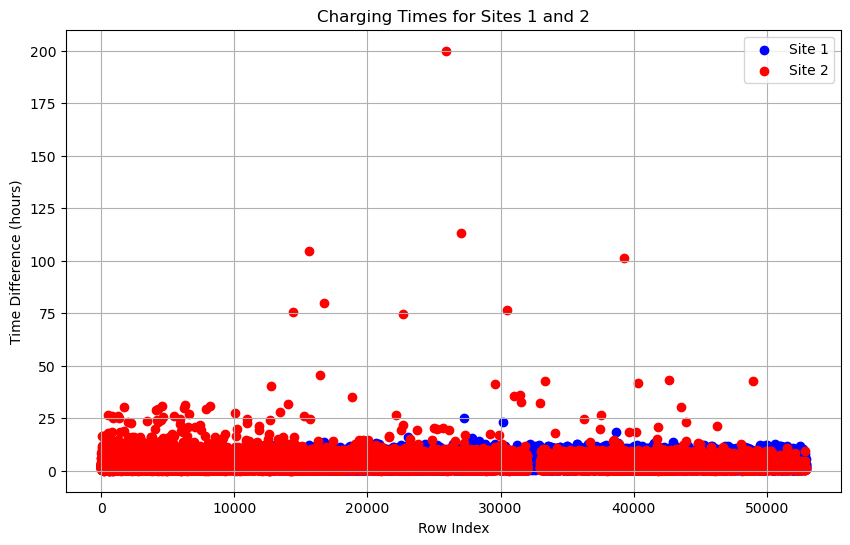

In [47]:
# Plot the time differences for site 1 in blue and site 2 in red
plt.figure(figsize=(10, 6))

# Plot time differences for site 1 (blue)
plt.scatter(df_charging[df_charging['siteID'] == '1'].index, df_charging[df_charging['siteID'] == '1']['ChargingTimeHours'], color='blue', label='Site 1')

# Plot time differences for site 2 (red)
plt.scatter(df_charging[df_charging['siteID'] == '2'].index, df_charging[df_charging['siteID'] == '2']['ChargingTimeHours'], color='red', label='Site 2')

plt.title('Charging Times for Sites 1 and 2')
plt.xlabel('Row Index')
plt.ylabel('Time Difference (hours)')
plt.legend()
plt.grid(True)
plt.show()

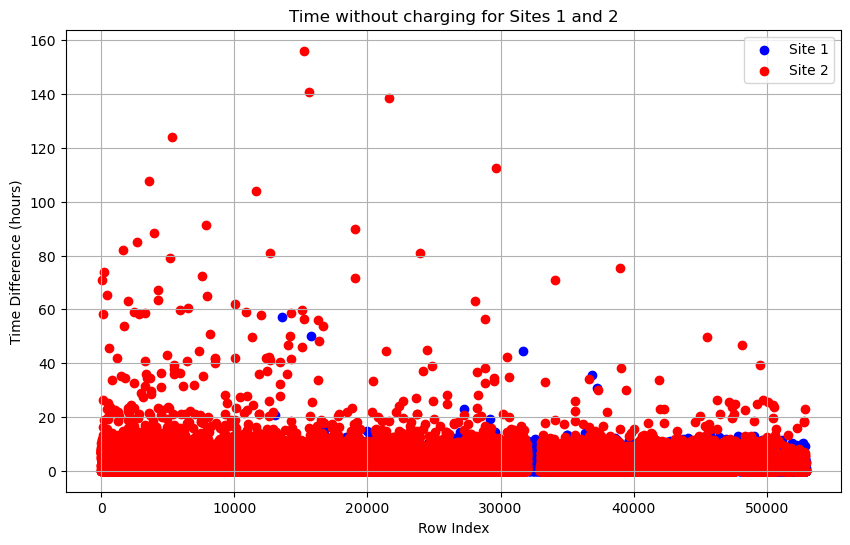

In [48]:
# Plot the time differences for station 1 in blue and station 2 in red
plt.figure(figsize=(10, 6))

# Plot time differences for station 1 (blue)
plt.scatter(df_charging[df_charging['siteID'] == '1'].index, df_charging[df_charging['siteID'] == '1']['NoChargingTimeHours'], color='blue', label='Site 1')

# Plot time differences for station 2 (red)
plt.scatter(df_charging[df_charging['siteID'] == '2'].index, df_charging[df_charging['siteID'] == '2']['NoChargingTimeHours'], color='red', label='Site 2')

plt.title('Time without charging for Sites 1 and 2')
plt.xlabel('Row Index')
plt.ylabel('Time Difference (hours)')
plt.legend()
plt.grid(True)
plt.show()

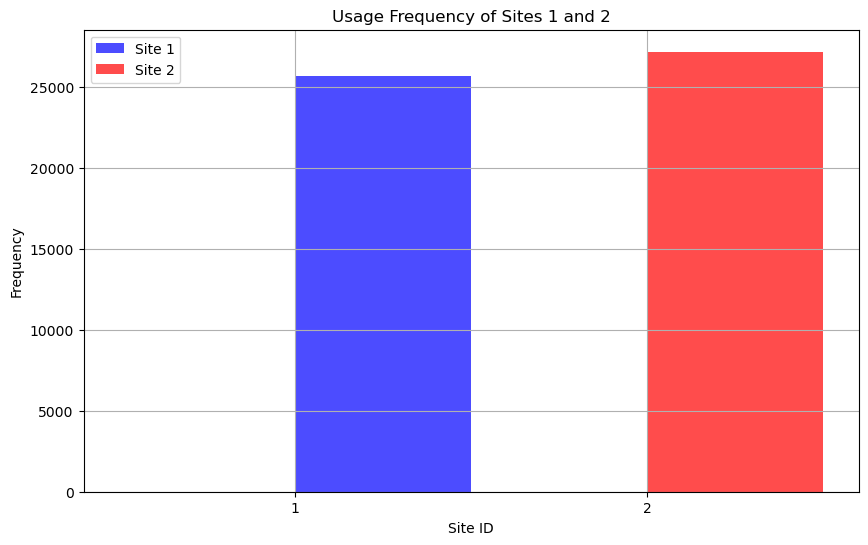

In [5]:
# Plot a histogram for the usage frequency of each site
plt.figure(figsize=(10, 6))

# Plot histogram for station 1
plt.hist(df_charging[df_charging['siteID'] == '1']['siteID'], histtype='stepfilled', bins=2, color='blue', alpha=0.7, label='Site 1')

# Plot histogram for station 2
plt.hist(df_charging[df_charging['siteID'] == '2']['siteID'], histtype='stepfilled', bins=2, color='red', alpha=0.7, label='Site 2')

plt.title('Usage Frequency of Sites 1 and 2')
plt.xlabel('Site ID')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

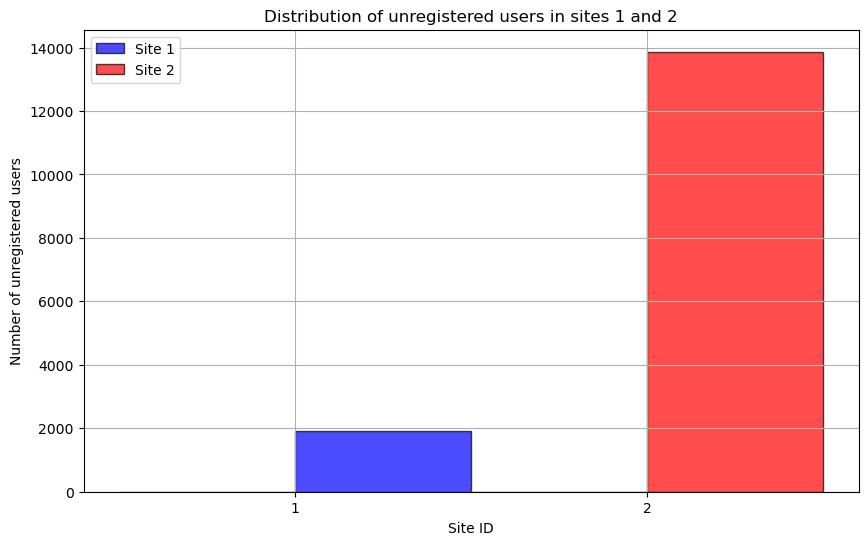

In [54]:
# Plot the distribution of unregistered users in both sites
plt.figure(figsize=(10, 6))

# Plot histogram for site 1
plt.hist(df_charging[(df_charging['siteID'] == '1') & (df_charging['userID'].isnull())]['siteID'], edgecolor='k', bins=2, color='blue', alpha=0.7, label='Site 1')

# Plot histogram for site 2
plt.hist(df_charging[(df_charging['siteID'] == '2') & (df_charging['userID'].isnull())]['siteID'], edgecolor='k', bins=2, color='red', alpha=0.7, label='Site 2')

plt.title('Distribution of unregistered users in sites 1 and 2')
plt.xlabel('Site ID')
plt.ylabel('Number of unregistered users')
plt.legend()
plt.grid(True)
plt.show()

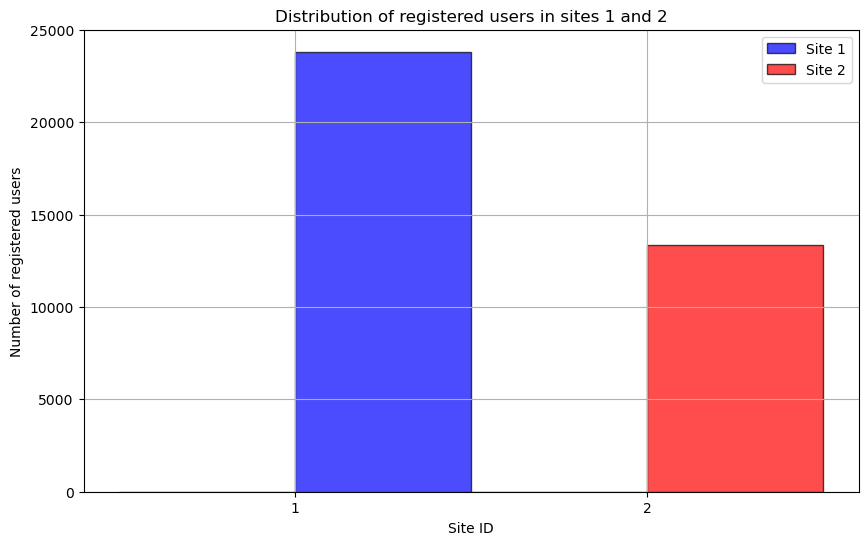

In [53]:
# Plot the distribution of registered users in both sites
plt.figure(figsize=(10, 6))

# Plot histogram for site 1
plt.hist(df_charging[(df_charging['siteID'] == '1') & (df_charging['userID'].notnull())]['siteID'], edgecolor='k', bins=2, color='blue', alpha=0.7, label='Site 1')

# Plot histogram for site 2
plt.hist(df_charging[(df_charging['siteID'] == '2') & (df_charging['userID'].notnull())]['siteID'], edgecolor='k', bins=2, color='red', alpha=0.7, label='Site 2')

plt.title('Distribution of registered users in sites 1 and 2')
plt.xlabel('Site ID')
plt.ylabel('Number of registered users')
plt.legend()
plt.grid(True)
plt.show()

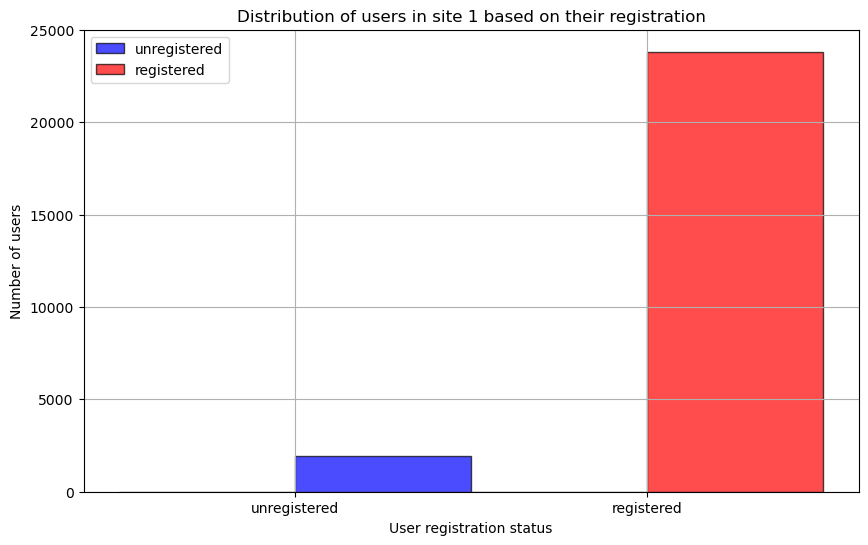

In [52]:
# Plot the distribution of users in site 1 based on their registration status
plt.figure(figsize=(10, 6))

# Plot histogram for unregistered users
plt.hist(df_charging[(df_charging['siteID'] == '1') & (df_charging['userID'].isnull())]['userRegistered'], edgecolor='k', bins=2, color='blue', alpha=0.7, label='unregistered')

# Plot histogram for registered users
plt.hist(df_charging[(df_charging['siteID'] == '1') & (df_charging['userID'].notnull())]['userRegistered'], edgecolor='k', bins=2, color='red', alpha=0.7, label='registered')

plt.title('Distribution of users in site 1 based on their registration')
plt.xlabel('User registration status')
plt.ylabel('Number of users')
plt.legend()
plt.grid(True)
plt.show()

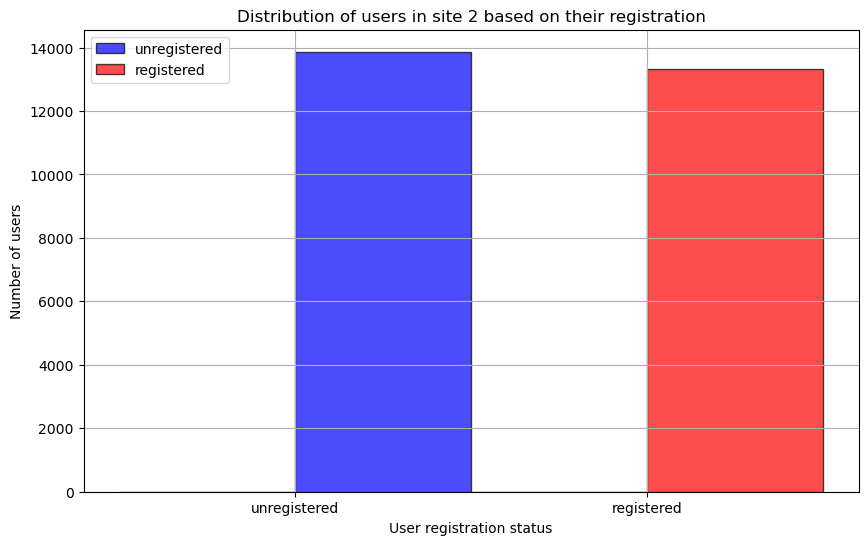

In [10]:
# Plot the distribution of users in site 2 based on their registration status
plt.figure(figsize=(10, 6))

# Plot histogram for unregistered users
plt.hist(df_charging[(df_charging['siteID'] == '2') & (df_charging['userID'].isnull())]['userRegistered'], edgecolor='k', bins=2, color='blue', alpha=0.7, label='unregistered')

# Plot histogram for registered users
plt.hist(df_charging[(df_charging['siteID'] == '2') & (df_charging['userID'].notnull())]['userRegistered'], edgecolor='k', bins=2, color='red', alpha=0.7, label='registered')

plt.title('Distribution of users in site 2 based on their registration')
plt.xlabel('User registration status')
plt.ylabel('Number of users')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Count how many unregistered users used station in site 1
df_charging[(df_charging['siteID'] == '1') & (df_charging['userID'].isnull())]['id'].count()

1908

In [13]:
# Count how many unregistered users used station in site 2
df_charging[(df_charging['siteID'] == '2') & (df_charging['userID'].isnull())]['id'].count()

13869

In [14]:
# Count how many registered users used station in site 1
df_charging[(df_charging['siteID'] == '1') & (df_charging['userID'].notnull())]['id'].count()

23817

In [15]:
# Count how many registered users used station in site 2
df_charging[(df_charging['siteID'] == '2') & (df_charging['userID'].notnull())]['id'].count()

13330

In [16]:
# Count how many unregistered users used station generally
df_charging[df_charging['userID'].isnull()]['id'].count()

15777

In [17]:
# Count how many registered users used station generally
df_charging[df_charging['userID'].notnull()]['id'].count()

37147

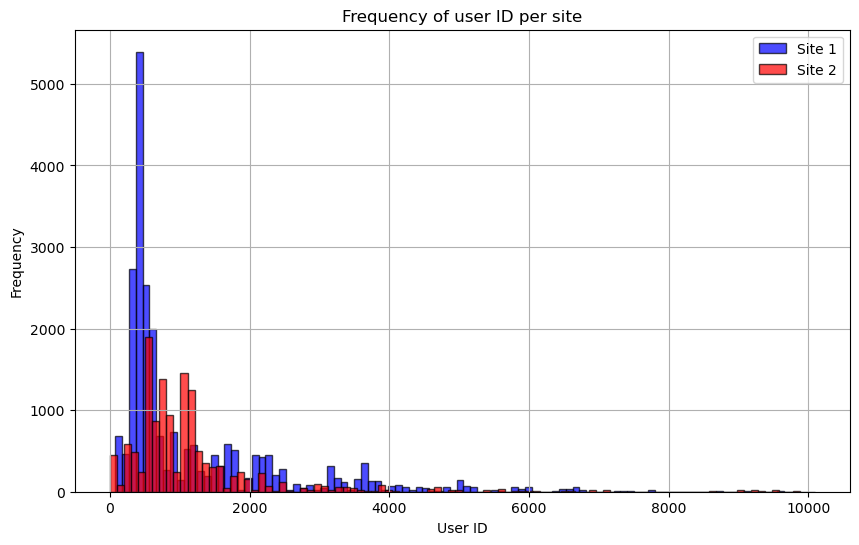

In [37]:
# Plot a histogram for the usage frequency of each userID per site
plt.figure(figsize=(10, 6))

# Plot histogram for site 1
plt.hist(df_charging[df_charging['siteID'] == '1']['userID'], edgecolor='k', bins=100, color='blue', alpha=0.7, label='Site 1')

# Plot histogram for site 2
plt.hist(df_charging[df_charging['siteID'] == '2']['userID'], edgecolor='k', bins=100, color='red', alpha=0.7, label='Site 2')

plt.title('Frequency of user ID per site')
plt.xlabel('User ID')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

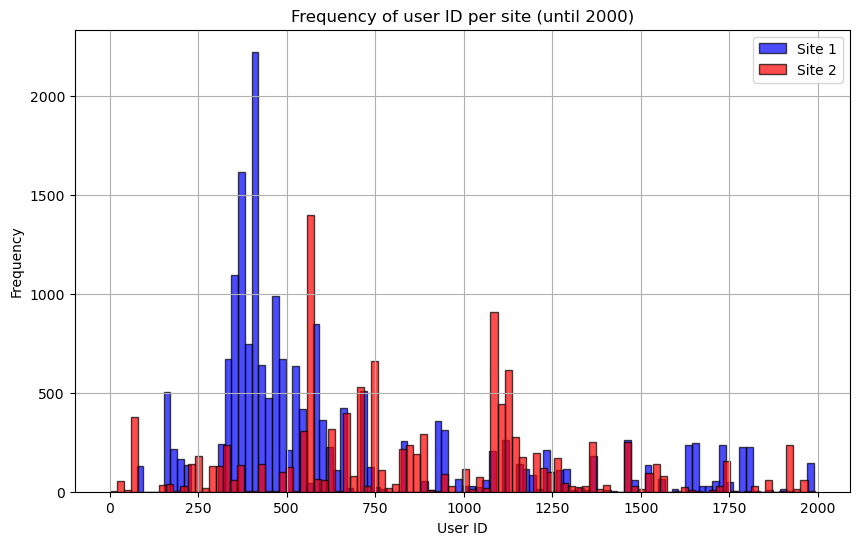

In [4]:
# Plot a histogram for the usage frequency of each userID per site (more detailed view on the first 2000)
plt.figure(figsize=(10, 6))

# Plot histogram for site 1
plt.hist(df_charging[(df_charging['siteID'] == '1') & (df_charging['userID'] < 2000)]['userID'], edgecolor='k', bins=100, color='blue', alpha=0.7, label='Site 1')

# Plot histogram for site 2
plt.hist(df_charging[(df_charging['siteID'] == '2') & (df_charging['userID'] < 2000)]['userID'], edgecolor='k', bins=100, color='red', alpha=0.7, label='Site 2')

plt.title('Frequency of user ID per site (until 2000)')
plt.xlabel('User ID')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

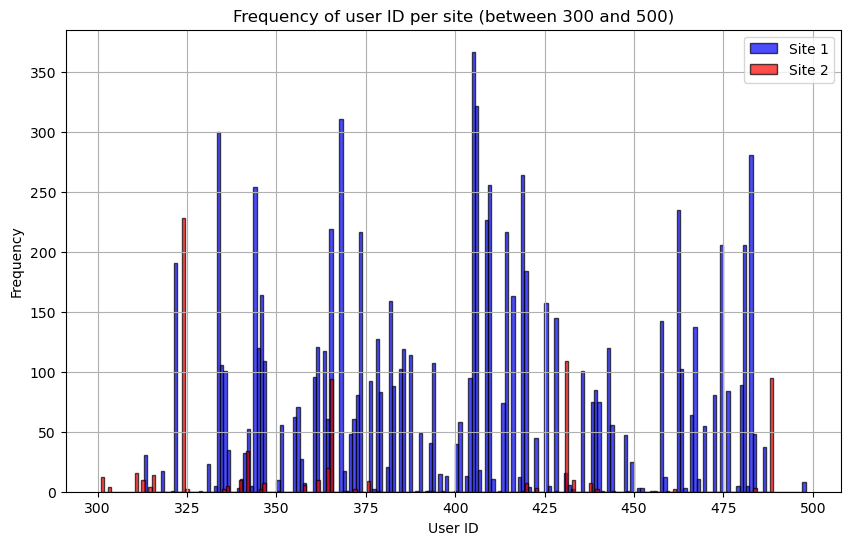

In [5]:
# Plot a histogram for the usage frequency of each userID per site (even more detailed view between 300 and 500)
plt.figure(figsize=(10, 6))

# Plot histogram for site 1
plt.hist(df_charging[(df_charging['siteID'] == '1') & (df_charging['userID'] < 500) & (df_charging['userID'] > 300)]['userID'], edgecolor='k', bins=200, color='blue', alpha=0.7, label='Site 1')

# Plot histogram for site 2
plt.hist(df_charging[(df_charging['siteID'] == '2') & (df_charging['userID'] < 500) & (df_charging['userID'] > 300)]['userID'], edgecolor='k', bins=200, color='red', alpha=0.7, label='Site 2')

plt.title('Frequency of user ID per site (between 300 and 500)')
plt.xlabel('User ID')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()